## Graphing Averages by Trends

In [1]:
import pandas as pd
import os, re
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
# Go through all the relevant csv in summary/ and add the means of each feature to a DataFrame

all_data = pd.DataFrame()
dir = 'summary/'
for file in os.listdir(dir):
    if re.match(r'^summary.\w*.csv$', file):
        name = file.split('.')[1].capitalize()
        if len(name) <= 2:
            name = name.upper()
        path = dir + file
        data = pd.read_csv(path, index_col='Name').mean().to_frame(name = name)
        all_data = pd.concat([all_data, data], axis=1)
all_data

,Austria,France,UK,Denmark,US,Switzerland,Sweden
Number of Edges,67.000000,8952.846154,663.000000,274.076923,101524.666667,1928.300000,5010.500000
Number of Vertices,63.142857,443.538462,675.000000,109.076923,548.000000,134.000000,384.000000
Clustering Coefficient,0.016175,0.763173,0.000000,0.349311,0.977124,0.744915,0.454209
Average Degree,2.069612,35.894410,1.964444,4.458657,370.523013,20.793193,26.038483
Average Excess Degree,3.393451,89.497382,236.666667,9.393970,430.300148,36.022373,34.940047
Average Distance,0.892857,2.426821,1.991582,2.264371,1.173752,1.854784,3.353197
Size of LCC,2.142857,140.000000,346.000000,25.461538,480.666667,53.200000,330.000000
Number of CC,59.142857,299.000000,12.000000,79.769231,1.666667,81.100000,32.125000


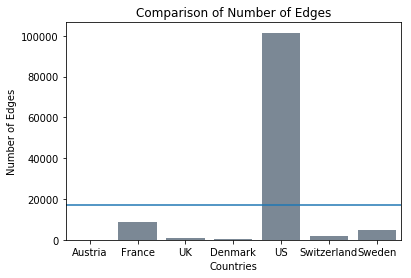

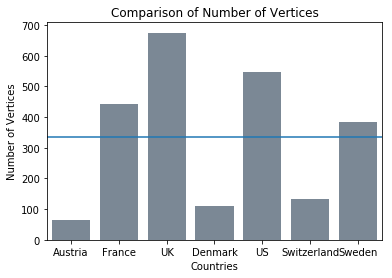

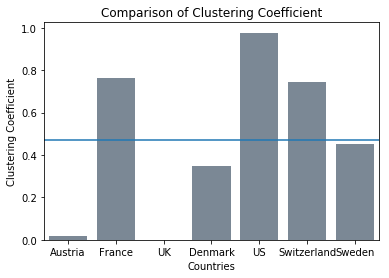

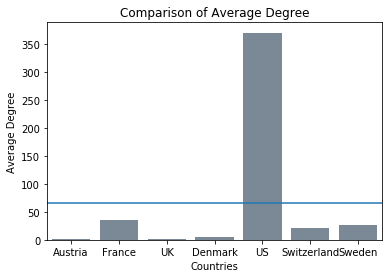

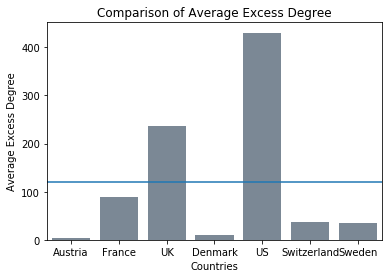

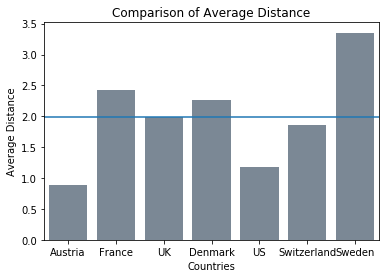

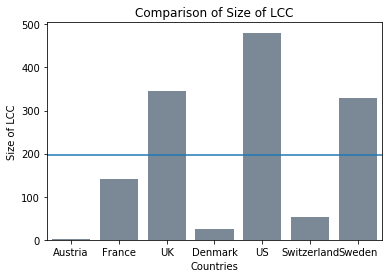

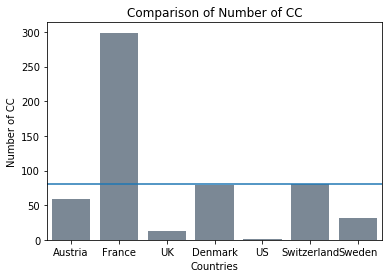

In [105]:
# For each feature, create a plot where x-axis = Countries, y-axis = Features

for count, x in enumerate(all_data.index):
    plt.figure()
    data = all_data.iloc[[count]]
    mean = float(data.mean(axis=1))
    plot = sns.barplot(data = data, ci = None, color = "lightslategray")
    plt.axhline(y=mean)
    trend = list(all_data.index.values)[count]
    title = "Comparison of " + trend
    plt.title(title)
    plt.ylabel(trend)
    plt.xlabel("Countries")
    
    # Save Figure
    save_path = 'plots/averages/' + trend
    fig = plot.get_figure()
    fig.savefig(save_path)